# 🏆 About Project 

 **🎯 Objective**

 Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features



**📅 Data Dictionary**

Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.

- market_id : integer id for the market where the restaurant lies
- created_at : the timestamp at which the order was placed
- actual_delivery_time : the timestamp when the order was delivered
- store_primary_category : category for the restaurant
- order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
- total_items subtotal : final price of the order
- num_distinct_items : the number of distinct items in the order
- min_item_price : price of the cheapest item in the order
- max_item_price : price of the costliest item in order
- total_onshift_partners : number of delivery partners on duty at the time order was placed
- total_busy_partners : number of delivery partners attending to other tasks
- total_outstanding_orders : total number of orders to be fulfilled at the moment

# 🚀 Let's Get Started

##  📚 Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
import time
import datetime as dt
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
warnings.filterwarnings("ignore")

## 📅 Importing Dataset

In [2]:
df = pd.read_csv('/kaggle/input/porter-dataset/dataset.csv')
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0


## 🎨 Custom Color Palette 

In [3]:
def custom_palette(custom_colors):
    customPalette = sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors),size=0.8)
    plt.tick_params(axis='both', labelsize=0, length = 0)
    

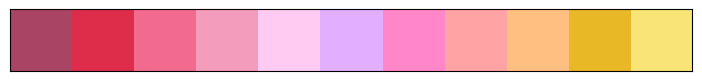

In [4]:
#defining colour palette
red = ["#4f000b","#720026","#ce4257","#ff7f51","#ff9b54"]
bo = ["#6930c3","#5e60ce","#0096c7","#48cae4","#ade8f4","#ff7f51","#ff9b54","#ffbf69"]
pink = ["#aa4465","#dd2d4a","#f26a8d","#f49cbb","#ffcbf2","#e2afff","#ff86c8","#ffa3a5","#ffbf81","#e9b827","#f9e576"]
custom_palette(pink)

##  💹 Basic Analysis

**Shape of the Data**

In [5]:
df.shape

(197428, 14)

**Inference**:

- Shape of dataframe is 197428 * 14
- Number of rows = 197428
- Number of columns = 14

**First 5 Rows**

In [6]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


**Columns in a Dataframe**

In [7]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')

**Concise Summary**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

**Inference**:

The columns 'market_id', 'actual_delivery_time', 'store_primary_category', 'order_protocol', 'total_onshift_partners', 'total_busy_partners', and 'total_outstanding_orders' have missing values.

**Statistical Summary**

In [9]:
# Statistical Summary of numeric Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
market_id,196441.0,2.978706,1.524867,1.0,2.0,3.0,4.0,6.0
order_protocol,196433.0,2.882352,1.503771,1.0,1.0,3.0,4.0,7.0
total_items,197428.0,3.196391,2.666546,1.0,2.0,3.0,4.0,411.0
subtotal,197428.0,2682.331402,1823.093688,0.0,1400.0,2200.0,3395.0,27100.0
num_distinct_items,197428.0,2.670791,1.630255,1.0,1.0,2.0,3.0,20.0
min_item_price,197428.0,686.218470,522.038648,-86.0,299.0,595.0,949.0,14700.0
max_item_price,197428.0,1159.588630,558.411377,0.0,800.0,1095.0,1395.0,14700.0
total_onshift_partners,181166.0,44.808093,34.526783,-4.0,17.0,37.0,65.0,171.0
total_busy_partners,181166.0,41.739747,32.145733,-5.0,15.0,34.0,62.0,154.0
total_outstanding_orders,181166.0,58.050065,52.661830,-6.0,17.0,41.0,85.0,285.0


In [10]:
# Statistical Summary of Categorical Columns
df.describe(include='object').T

,count,unique,top,freq
created_at,197428,180985,2015-02-11 19:50:43,6
actual_delivery_time,197421,178110,2015-02-08 04:09:25,5
store_id,197428,6743,d43ab110ab2489d6b9b2caa394bf920f,937
store_primary_category,192668,74,american,19399


**Checking For Missing Values**

In [11]:
np.round(((df.isnull().sum())/(df.shape[0]))*100,2)

market_id                   0.50
created_at                  0.00
actual_delivery_time        0.00
store_id                    0.00
store_primary_category      2.41
order_protocol              0.50
total_items                 0.00
subtotal                    0.00
num_distinct_items          0.00
min_item_price              0.00
max_item_price              0.00
total_onshift_partners      8.24
total_busy_partners         8.24
total_outstanding_orders    8.24
dtype: float64

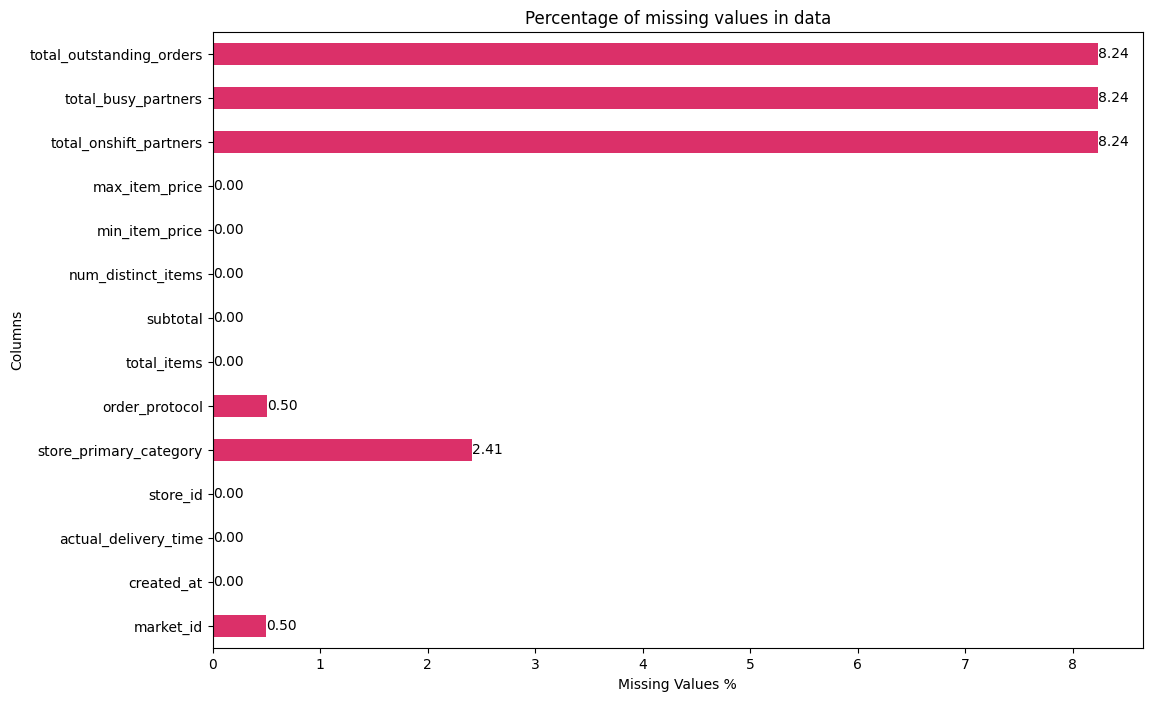

In [12]:
plt.figure(figsize = (12,8))
ax = ((df.isnull().sum()/df.shape[0])*100).plot(kind = 'barh', color = '#DB3069')
for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f')
plt.xlabel('Missing Values %')
plt.ylabel('Columns')
plt.title('Percentage of missing values in data')
sns.set_style('darkgrid')
plt.show()

In [13]:
df['order_protocol'].value_counts()

order_protocol
1.0    54725
3.0    53199
5.0    44290
2.0    24052
4.0    19354
6.0      794
7.0       19
Name: count, dtype: int64

# ⚒️  Data Preprocessing

## ♊ Duplicate Value check

In [14]:
df[df.duplicated()]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders


In [15]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [market_id, created_at, actual_delivery_time, store_id, store_primary_category, order_protocol, total_items, subtotal, num_distinct_items, min_item_price, max_item_price, total_onshift_partners, total_busy_partners, total_outstanding_orders]
Index: []


## 🧹 Handling Missing Values

Startegies to handle missing data

1️⃣ Numeric Features:

For numeric features we can use median imputation to prevent extreme values from affecting the distribution

2️⃣ Categorical/Discerete Features:

All categorical features have only 2 to 5 unique values, making it suitable to impute missing values using the most frequent category.

**Missing Values Check**

In [16]:
np.round(((df.isnull().sum())/(df.shape[0]))*100,2)

market_id                   0.50
created_at                  0.00
actual_delivery_time        0.00
store_id                    0.00
store_primary_category      2.41
order_protocol              0.50
total_items                 0.00
subtotal                    0.00
num_distinct_items          0.00
min_item_price              0.00
max_item_price              0.00
total_onshift_partners      8.24
total_busy_partners         8.24
total_outstanding_orders    8.24
dtype: float64

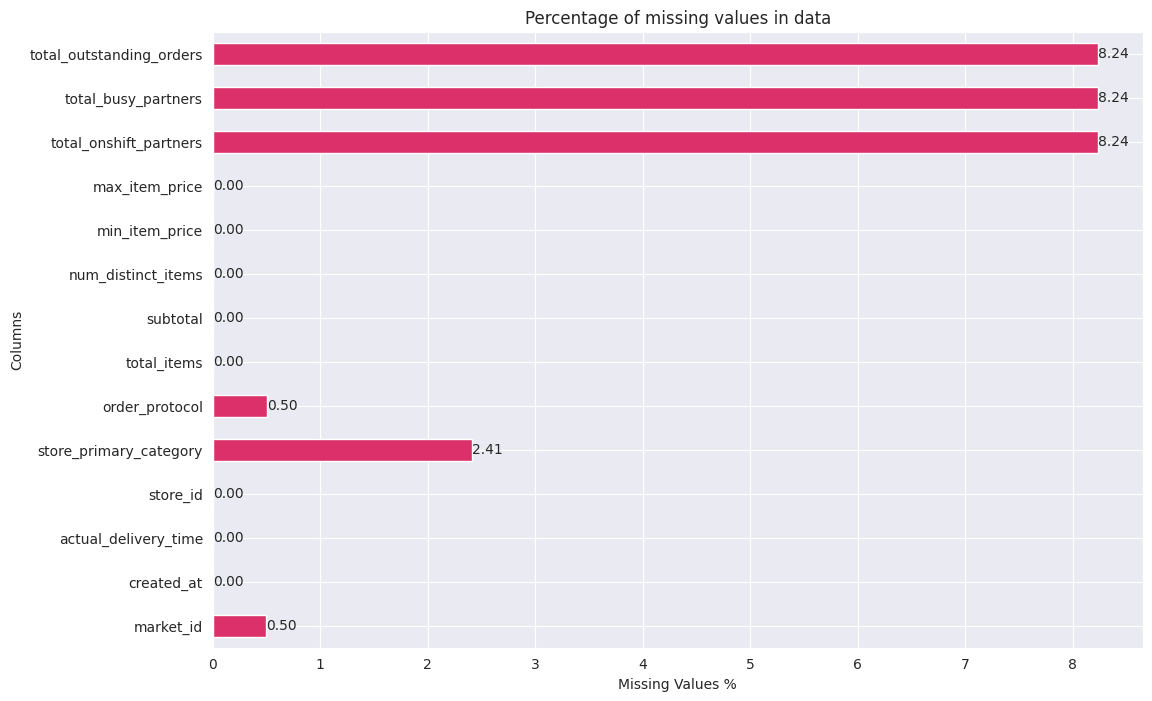

In [17]:
plt.figure(figsize = (12,8))
ax = ((df.isnull().sum()/df.shape[0])*100).plot(kind = 'barh', color = '#DB3069')
for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f')
plt.xlabel('Missing Values %')
plt.ylabel('Columns')
plt.title('Percentage of missing values in data')
sns.set_style('darkgrid')
plt.show()

**Handling Missing Values in 'order_protocol' Column

In [18]:
df['order_protocol'].skew()

0.13709259426641762

**Inference**:

As column is discrete and not skewed we will use mode or most frequent value to impute missing values in the data

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df['order_protocol'] = imputer.fit_transform(df[['order_protocol']])
df.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                  0
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [20]:
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0


**Dropping columns 'market_id, 'store_id', 'store_primary_category'**

Dropping the columns 'market_id', 'store_id', and 'store_primary_category' as they are not relevant to the given business context.

In [21]:
df = df.drop(columns = ['market_id', 'store_id', 'store_primary_category'])

In [22]:
df

,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,2015-02-06 22:24:17,2015-02-06 23:27:16,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2015-02-10 21:49:25,2015-02-10 22:56:29,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,2015-01-22 20:39:28,2015-01-22 21:09:09,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,2015-02-03 21:21:45,2015-02-03 22:13:00,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,2015-02-15 02:40:36,2015-02-15 03:20:26,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
197423,2015-02-17 00:19:41,2015-02-17 01:24:48,4.0,3,1389,3,345,649,17.0,17.0,23.0
197424,2015-02-13 00:01:59,2015-02-13 00:58:22,4.0,6,3010,4,405,825,12.0,11.0,14.0
197425,2015-01-24 04:46:08,2015-01-24 05:36:16,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,2015-02-01 18:18:15,2015-02-01 19:23:22,1.0,1,1175,1,535,535,7.0,7.0,12.0


**Handling Missing Values in Continuos Columns

In [23]:
print(df['total_onshift_partners'].skew())
print(df['total_busy_partners'].skew())
print(df['total_outstanding_orders'].skew())


0.8607580961811951
0.7824625946552558
1.1953217621678773


**Inference**:

Since all three columns are right-skewed, median imputation is the appropriate method to fill the missing values in these columns.

In [24]:
cols = ['total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
for col in  cols:
    df[col].fillna(df[col].median(), inplace=True)

In [25]:
df.isnull().sum()

created_at                  0
actual_delivery_time        7
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

**Dropping remaining Null Values**

In [26]:
df.dropna(inplace=True)
df.isnull().sum()

created_at                  0
actual_delivery_time        0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

In [27]:
df.shape

(197421, 11)

## 👾 Handling Outliers

**Outlier Detection using Box plot**

In [28]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'min_item_price', 'max_item_price', 'total_onshift_partners',
       'total_busy_partners', 'total_outstanding_orders'],
      dtype='object')

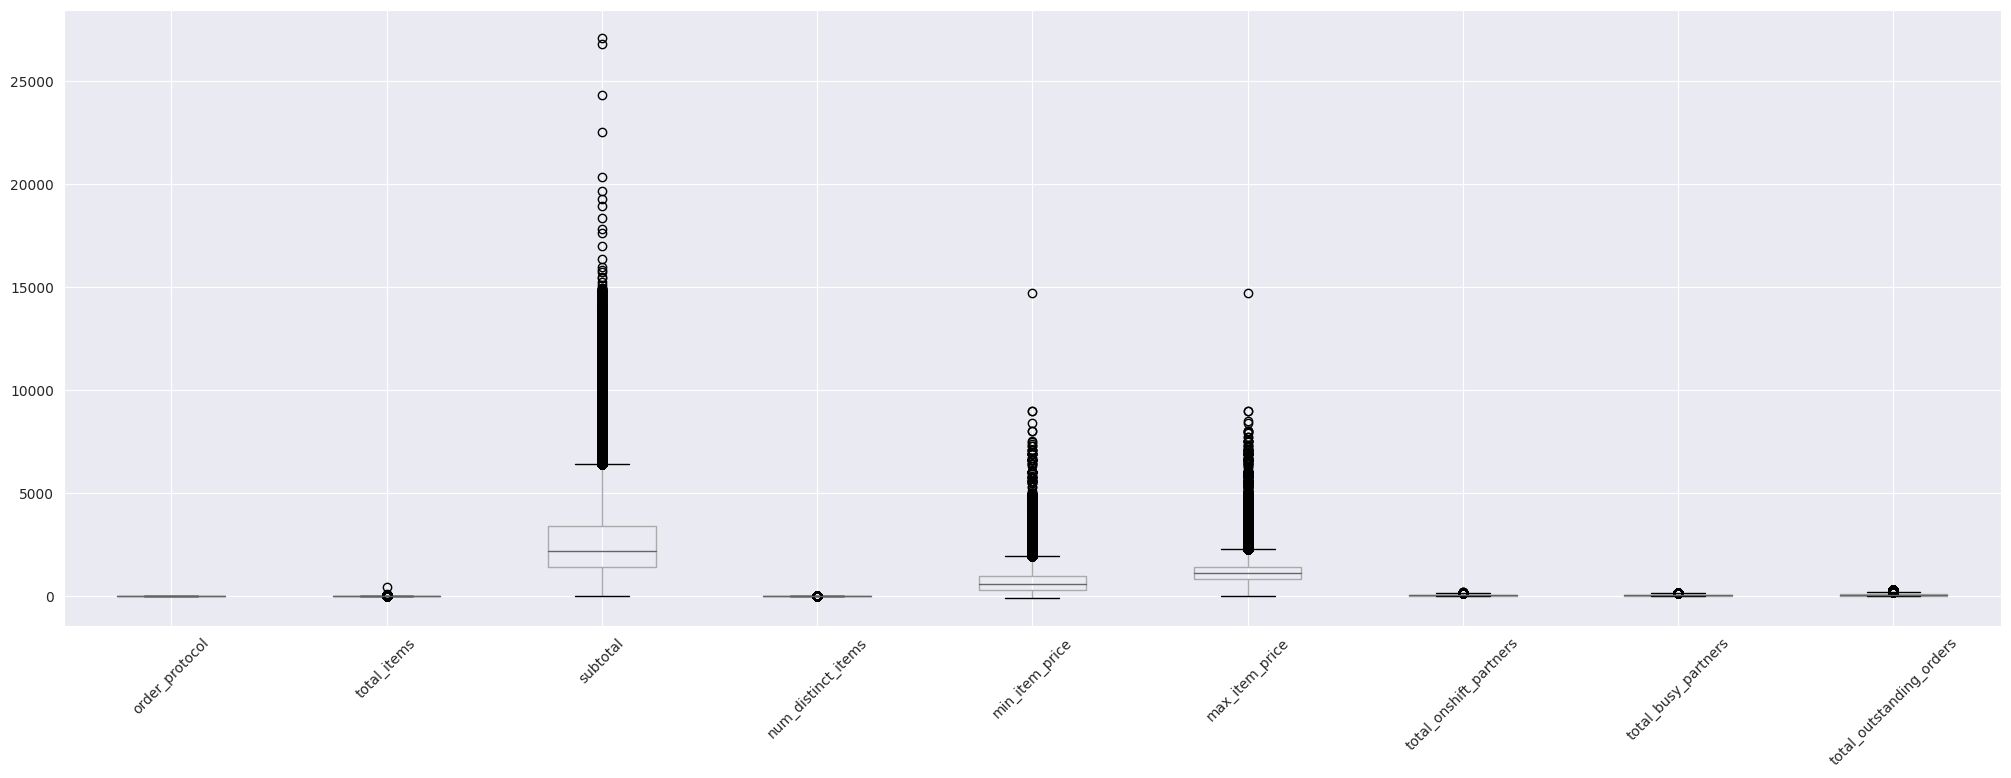

In [29]:
df[num_cols].boxplot(rot=45,figsize=(25,8))
plt.show()

**Handling outliers using LOF method**

In [30]:
len_before = len(df)
len_before

197421

In [31]:
from sklearn.neighbors import LocalOutlierFactor
model1 = LocalOutlierFactor()
df['LOF_anomaly_score'] = model1.fit_predict(df[num_cols])
df

,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,LOF_anomaly_score
0,2015-02-06 22:24:17,2015-02-06 23:27:16,1.0,4,3441,4,557,1239,33.0,14.0,21.0,1
1,2015-02-10 21:49:25,2015-02-10 22:56:29,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,1
2,2015-01-22 20:39:28,2015-01-22 21:09:09,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,1
3,2015-02-03 21:21:45,2015-02-03 22:13:00,1.0,6,6900,5,600,1800,1.0,1.0,2.0,1
4,2015-02-15 02:40:36,2015-02-15 03:20:26,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
197423,2015-02-17 00:19:41,2015-02-17 01:24:48,4.0,3,1389,3,345,649,17.0,17.0,23.0,1
197424,2015-02-13 00:01:59,2015-02-13 00:58:22,4.0,6,3010,4,405,825,12.0,11.0,14.0,1
197425,2015-01-24 04:46:08,2015-01-24 05:36:16,4.0,5,1836,3,300,399,39.0,41.0,40.0,1
197426,2015-02-01 18:18:15,2015-02-01 19:23:22,1.0,1,1175,1,535,535,7.0,7.0,12.0,1


In [32]:
outliers = len(df.loc[(df['LOF_anomaly_score']==-1)])
print(f'Number of outliers:{outliers}')

Number of outliers:6595


In [33]:
df=df.loc[(df['LOF_anomaly_score'] == 1)]
df

,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,LOF_anomaly_score
0,2015-02-06 22:24:17,2015-02-06 23:27:16,1.0,4,3441,4,557,1239,33.0,14.0,21.0,1
1,2015-02-10 21:49:25,2015-02-10 22:56:29,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,1
2,2015-01-22 20:39:28,2015-01-22 21:09:09,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,1
3,2015-02-03 21:21:45,2015-02-03 22:13:00,1.0,6,6900,5,600,1800,1.0,1.0,2.0,1
4,2015-02-15 02:40:36,2015-02-15 03:20:26,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
197423,2015-02-17 00:19:41,2015-02-17 01:24:48,4.0,3,1389,3,345,649,17.0,17.0,23.0,1
197424,2015-02-13 00:01:59,2015-02-13 00:58:22,4.0,6,3010,4,405,825,12.0,11.0,14.0,1
197425,2015-01-24 04:46:08,2015-01-24 05:36:16,4.0,5,1836,3,300,399,39.0,41.0,40.0,1
197426,2015-02-01 18:18:15,2015-02-01 19:23:22,1.0,1,1175,1,535,535,7.0,7.0,12.0,1


In [34]:
len_after = len(df)
len_after

190826

In [35]:
((len_before-len_after)/ (len_before))*100

3.3405767370239237

**Inference**

A total of 3.34% of outlier values have been removed from the dataset using the LOF method.

In [36]:
df.drop(columns = ['LOF_anomaly_score'],inplace=True)
df

,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,2015-02-06 22:24:17,2015-02-06 23:27:16,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2015-02-10 21:49:25,2015-02-10 22:56:29,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,2015-01-22 20:39:28,2015-01-22 21:09:09,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,2015-02-03 21:21:45,2015-02-03 22:13:00,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,2015-02-15 02:40:36,2015-02-15 03:20:26,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
197423,2015-02-17 00:19:41,2015-02-17 01:24:48,4.0,3,1389,3,345,649,17.0,17.0,23.0
197424,2015-02-13 00:01:59,2015-02-13 00:58:22,4.0,6,3010,4,405,825,12.0,11.0,14.0
197425,2015-01-24 04:46:08,2015-01-24 05:36:16,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,2015-02-01 18:18:15,2015-02-01 19:23:22,1.0,1,1175,1,535,535,7.0,7.0,12.0


## 🛠️ Feature Engineering

**Extraction datetime Features**

In [37]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190826 entries, 0 to 197427
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   created_at                190826 non-null  datetime64[ns]
 1   actual_delivery_time      190826 non-null  datetime64[ns]
 2   order_protocol            190826 non-null  float64       
 3   total_items               190826 non-null  int64         
 4   subtotal                  190826 non-null  int64         
 5   num_distinct_items        190826 non-null  int64         
 6   min_item_price            190826 non-null  int64         
 7   max_item_price            190826 non-null  int64         
 8   total_onshift_partners    190826 non-null  float64       
 9   total_busy_partners       190826 non-null  float64       
 10  total_outstanding_orders  190826 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(5)
memory usage: 17.5 MB


In [38]:
df['hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.weekday
df.head()

,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,hour,day_of_week
0,2015-02-06 22:24:17,2015-02-06 23:27:16,1.0,4,3441,4,557,1239,33.0,14.0,21.0,22,4
1,2015-02-10 21:49:25,2015-02-10 22:56:29,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,21,1
2,2015-01-22 20:39:28,2015-01-22 21:09:09,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,20,3
3,2015-02-03 21:21:45,2015-02-03 22:13:00,1.0,6,6900,5,600,1800,1.0,1.0,2.0,21,1
4,2015-02-15 02:40:36,2015-02-15 03:20:26,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,2,6


**Generating Target Column**

To predict delivery time, we calculate it by subtracting the created time from the actual delivery time.

Time Taken = Actual Delivery Time - Created at

In [39]:
df['time_taken'] = (df['actual_delivery_time']-df['created_at']).dt.total_seconds()/60
df

,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,hour,day_of_week,time_taken
0,2015-02-06 22:24:17,2015-02-06 23:27:16,1.0,4,3441,4,557,1239,33.0,14.0,21.0,22,4,62.983333
1,2015-02-10 21:49:25,2015-02-10 22:56:29,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,21,1,67.066667
2,2015-01-22 20:39:28,2015-01-22 21:09:09,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,20,3,29.683333
3,2015-02-03 21:21:45,2015-02-03 22:13:00,1.0,6,6900,5,600,1800,1.0,1.0,2.0,21,1,51.250000
4,2015-02-15 02:40:36,2015-02-15 03:20:26,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,2,6,39.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,2015-02-17 00:19:41,2015-02-17 01:24:48,4.0,3,1389,3,345,649,17.0,17.0,23.0,0,1,65.116667
197424,2015-02-13 00:01:59,2015-02-13 00:58:22,4.0,6,3010,4,405,825,12.0,11.0,14.0,0,4,56.383333
197425,2015-01-24 04:46:08,2015-01-24 05:36:16,4.0,5,1836,3,300,399,39.0,41.0,40.0,4,5,50.133333
197426,2015-02-01 18:18:15,2015-02-01 19:23:22,1.0,1,1175,1,535,535,7.0,7.0,12.0,18,6,65.116667


In [40]:
df.drop(columns=['created_at','actual_delivery_time'],inplace = True)
df

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,hour,day_of_week,time_taken
0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,22,4,62.983333
1,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,21,1,67.066667
2,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,20,3,29.683333
3,1.0,6,6900,5,600,1800,1.0,1.0,2.0,21,1,51.250000
4,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,2,6,39.833333
...,...,...,...,...,...,...,...,...,...,...,...,...
197423,4.0,3,1389,3,345,649,17.0,17.0,23.0,0,1,65.116667
197424,4.0,6,3010,4,405,825,12.0,11.0,14.0,0,4,56.383333
197425,4.0,5,1836,3,300,399,39.0,41.0,40.0,4,5,50.133333
197426,1.0,1,1175,1,535,535,7.0,7.0,12.0,18,6,65.116667


In [41]:
df.isnull().sum()

order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
hour                        0
day_of_week                 0
time_taken                  0
dtype: int64

## ✂️ Splitting Dataset into Training and Test Sets

In [42]:
X = df.drop(columns=['time_taken'])
y = df['time_taken']

In [43]:
X

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,hour,day_of_week
0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,22,4
1,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,21,1
2,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,20,3
3,1.0,6,6900,5,600,1800,1.0,1.0,2.0,21,1
4,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,2,6
...,...,...,...,...,...,...,...,...,...,...,...
197423,4.0,3,1389,3,345,649,17.0,17.0,23.0,0,1
197424,4.0,6,3010,4,405,825,12.0,11.0,14.0,0,4
197425,4.0,5,1836,3,300,399,39.0,41.0,40.0,4,5
197426,1.0,1,1175,1,535,535,7.0,7.0,12.0,18,6


In [44]:
y

0         62.983333
1         67.066667
2         29.683333
3         51.250000
4         39.833333
            ...    
197423    65.116667
197424    56.383333
197425    50.133333
197426    65.116667
197427    37.133333
Name: time_taken, Length: 190826, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
X_dev, X_test, y_dev, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_dev,y_dev, test_size = 0.3, random_state = 42)


In [46]:
print(f'Shape of Training Data : {X_train.shape}' )
print(f'Shape of Validation Data: {X_val.shape}')
print(f'Shape of Test Data : {X_test.shape}')


Shape of Training Data : (93504, 11)
Shape of Validation Data: (40074, 11)
Shape of Test Data : (57248, 11)


## ⚖️ Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

In [48]:
X_train

array([[ 0.08274837, -0.10103293,  0.11388577, ..., -0.86544944,
        -0.74047761, -0.59830014],
       [ 1.40921915, -0.50001016,  0.0865589 , ...,  1.35593267,
        -0.62464683,  0.38135079],
       [ 1.40921915, -0.8989874 , -0.9387454 , ..., -0.57057571,
         1.57613803,  0.87117625],
       ...,
       [ 0.08274837, -0.8989874 ,  0.15432955, ..., -0.31501847,
        -0.85630839,  1.36100172],
       [-0.58048701, -0.8989874 , -0.55562263, ...,  2.16192087,
        -0.74047761, -1.57795106],
       [-0.58048701, -0.50001016, -0.77423762, ..., -0.84579119,
        -0.39298526, -0.10847467]])

In [49]:
X_val

array([[ 0.08725025,  0.69653103,  1.13846827, ...,  0.21765674,
        -0.85824359, -1.58401998],
       [-1.24422976, -0.90399561, -0.83850072, ...,  3.31266929,
        -0.62699113,  0.86711475],
       [-1.24422976, -0.10373229, -0.40082175, ..., -0.6103084 ,
         1.6855335 ,  1.3573417 ],
       ...,
       [ 0.75299025, -0.10373229,  1.35263991, ..., -0.82715641,
         1.22302857,  1.3573417 ],
       [ 0.08725025, -0.10373229, -0.16029053, ..., -0.51174112,
         1.45428103,  0.86711475],
       [ 0.08725025, -0.50386395,  0.369647  , ..., -0.11747201,
        -0.85824359,  1.3573417 ]])

In [50]:
X_test

array([[-1.24804053,  3.06806944,  2.24890821, ...,  2.27750118,
        -0.62612346,  0.86604942],
       [-1.24804053, -0.09812076, -0.88210793, ..., -1.05991403,
         1.10811109, -0.11100397],
       [ 0.0824466 , -0.49389453, -0.72152895, ..., -0.82433178,
         1.33934237, -1.08805736],
       ...,
       [-1.24804053,  1.08920057,  0.46829007, ..., -0.66727694,
        -0.85735473, -0.59953067],
       [ 0.74769017, -0.09812076, -0.8667625 , ...,  0.15726093,
        -0.97297037, -1.08805736],
       [ 0.74769017, -0.09812076,  0.0978075 , ...,  0.49100245,
        -0.7417391 , -1.57658406]])

#  Model Training and Building

## 🛠️ Hyperparameter Tuning using Keras Tuner

**Define the model**

In [51]:
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()

    #Define input Layer
    model.add(keras.layers.Dense(
        units = hp.Int('units', min_value = 32, max_value = 512 , step = 32), # Tune neurons 32-512
    ))
    # Apply leaky relu activation funtion
    model.add(keras.layers.LeakyReLU(alpha=0.1))

    # Batch Normalization after input layer
    model.add(keras.layers.BatchNormalization())

    # Hidden Layers with Batch Normalization & optional dropout
    for i in range(hp.Int('num_layers',1,5)): # Tune number of hidden layers : (1 to 5)
        model.add(keras.layers.Dense(
            units = hp.Int(f'units_{i}', min_value = 32, max_value = 512, step = 32),
        ))
        
        model.add(keras.layers.LeakyReLU(alpha=0.1))
        model.add(keras.layers.BatchNormalization())

        # Apply Dropout only if hp.Boolean is True
        if hp.Boolean(f'apply_dropout_{i}'):
            model.add(keras.layers.Dropout(hp.Float(f'dropout_{i}', min_value = 0.1, max_value = 0.5 , step = 0.1)))
    
    # Output Layer : (Regression : Single Neuron, Linear Activation)
    model.add(keras.layers.Dense(1, activation = 'linear'))

    # Compile model with built-in R2 metric
    model.compile(
        optimizer = keras.optimizers.Adam(
            learning_rate = hp.Float('learning_rate', min_value = 0.0001, max_value = 0.01, sampling = 'log')
        ),
        loss = 'mse', # mean squared error for regression tasks
        metrics = [keras.metrics.R2Score()] # R2 metric to evaluate performance on validation data
        
    )

    return model

    
        

**Hyperparameter Tuning using Bayesian optimization**

In [52]:
tuner = kt.BayesianOptimization(
    build_model,
    objective = kt.Objective('val_r2_score', direction = 'max'),# Maximize R2 Score
    max_trials = 20, # Number of hyperparameter combinations to test
    executions_per_trial = 2 , # runs each model twice for stability
    directory = '/kaggle/working/',
    project_name = 'Porter : NN Regression'
)

**Start Hyperparameter Tuning**

In [53]:
tuner.search(
    X_train, y_train, epochs = 20, validation_data = (X_val,y_val), batch_size=512
)

Trial 20 Complete [00h 00m 51s]
val_r2_score: 0.16204094886779785

Best val_r2_score So Far: 0.2188969850540161
Total elapsed time: 00h 13m 53s


**Retrive Best Hyperparameters**

In [54]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Best number of units: {best_hps.get('units')}
Best number of layers: {best_hps.get('num_layers')}
Best learning rate: {best_hps.get('learning_rate')}
""")

for i in range(best_hps.get('num_layers')):
    if best_hps.get(f'apply_dropout_{i}'):
        print(f"Dropout applied in layer {i} with rate {best_hps.get(f'dropout_{i}')}")
    else:
        print(f"No Dropout in layer {i}")


Best number of units: 480
Best number of layers: 4
Best learning rate: 0.0028410712033130328

No Dropout in layer 0
Dropout applied in layer 1 with rate 0.1
Dropout applied in layer 2 with rate 0.4
Dropout applied in layer 3 with rate 0.30000000000000004


**Train the Best Model**

In [55]:
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs = 50 , batch_size = 512, validation_data = (X_val,y_val))

Epoch 1/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 2293.4517 - r2_score: -3.7613 - val_loss: 357.0254 - val_r2_score: 8.5402e-04
Epoch 2/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 647.9234 - r2_score: 0.0613 - val_loss: 312.3188 - val_r2_score: 0.1260
Epoch 3/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1064.4945 - r2_score: 0.0521 - val_loss: 297.8680 - val_r2_score: 0.1664
Epoch 4/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 450.2378 - r2_score: 0.1151 - val_loss: 294.2622 - val_r2_score: 0.1765
Epoch 5/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 632.4871 - r2_score: 0.0963 - val_loss: 297.6067 - val_r2_score: 0.1671
Epoch 6/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 833.0921 - r2_score: 0.0781 - val_loss: 288.9323 - val_r2_score: 0.1914
Epoch 7/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 928.0660 - r2_score: 0.0771 - val_loss: 290.3621 - val_r2_score: 0.1874
Epoch 8/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 434.796

**Final Predictions**

In [56]:
y_pred = best_model.predict(X_test)
y_pred

1789/1789 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


array([[59.072086],
       [38.17821 ],
       [32.701714],
       ...,
       [51.22157 ],
       [44.75637 ],
       [87.96792 ]], dtype=float32)

## Evaluating Model performance 

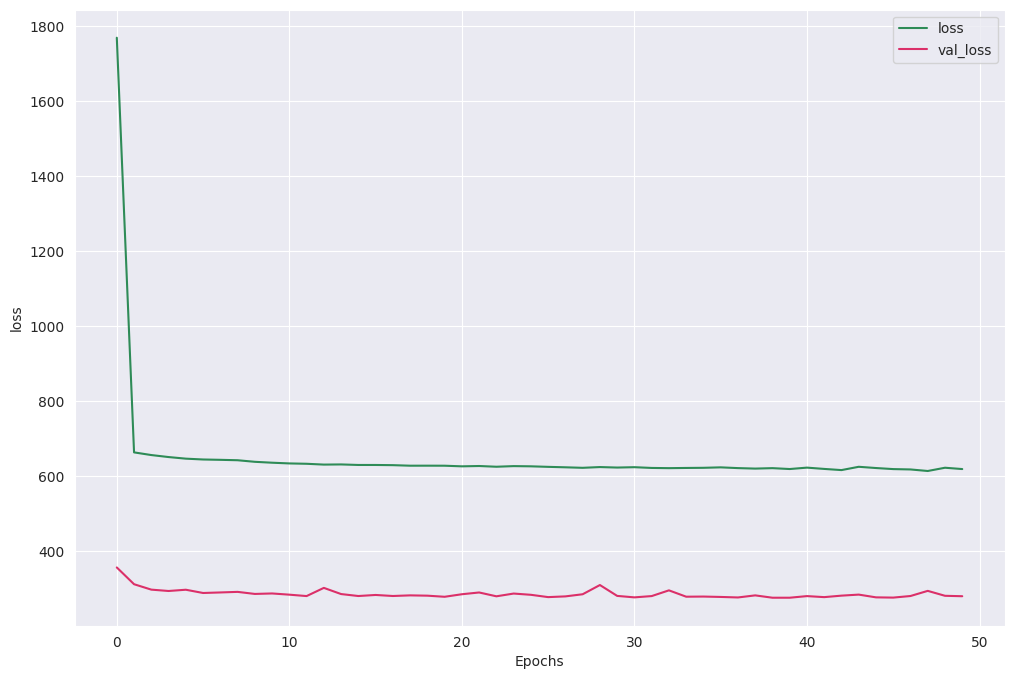

In [57]:
def plot_history(history, key):
    plt.figure(figsize = (12,8))
    plt.plot(history.history[key],color = 'seagreen')
    plt.plot(history.history['val_'+key],color = '#DB3069' )
    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.legend([key, 'val_'+key])
    plt.show()
plot_history(history,'loss')

**Performance Metrics**

In [58]:
from sklearn.metrics import r2_score

def adjusted_r2_score(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

In [59]:
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(f'MSE : {mean_squared_error(y_test,y_pred)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test,y_pred))}')
print(f'MAE : {mean_absolute_error(y_test,y_pred)}')
print(f'R2 Score : {r2_score(y_test,y_pred)}')
print(f'Adj R2 Score : {adjusted_r2_score(y_test,y_pred,n,p)}')


MSE : 352708.61253574694
RMSE : 593.8927618145779
MAE : 14.314486672359848
R2 Score : 0.00018039537232761305
Adj R2 Score : -1.1756693695463838e-05
